<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>



# **실습: 이변량 분석 ① - 수치형  → 수치형**

## **1. 환경준비**

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (6, 4)

In [12]:
# CarSeat 데이터
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Carseats.csv'
carseat = pd.read_csv(path)
carseat.drop('Education', axis=1, inplace=True)
carseat.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


**📋 데이터 정보**

- Sales: 각 지역 판매량(단위: 1,000개)
- CompPrice: 경쟁사 가격(단위: 달러)
- Income: 지역 평균 소득(단위: 1,000달러)
- Advertising: 각 지역, 회사의 광고 예산(단위: 1,000달러)
- Population: 지역 인구수(단위: 1,000명)
- Price: 자사 지역별 판매가격
- ShelveLoc: 진열상태
- Age: 지역 인구의 평균 연령
- Urban: 도심 지역 여부(Yes, No)
- US: 매장이 미국에 있는지 여부(Yes, No)

## **2. 시각화**

**1) 다음 두 변수들 간의 상관관계를 산점도로 시각화해 확인하세요.**

1️⃣ **평균소득(Income) → 판매량(Sales)**

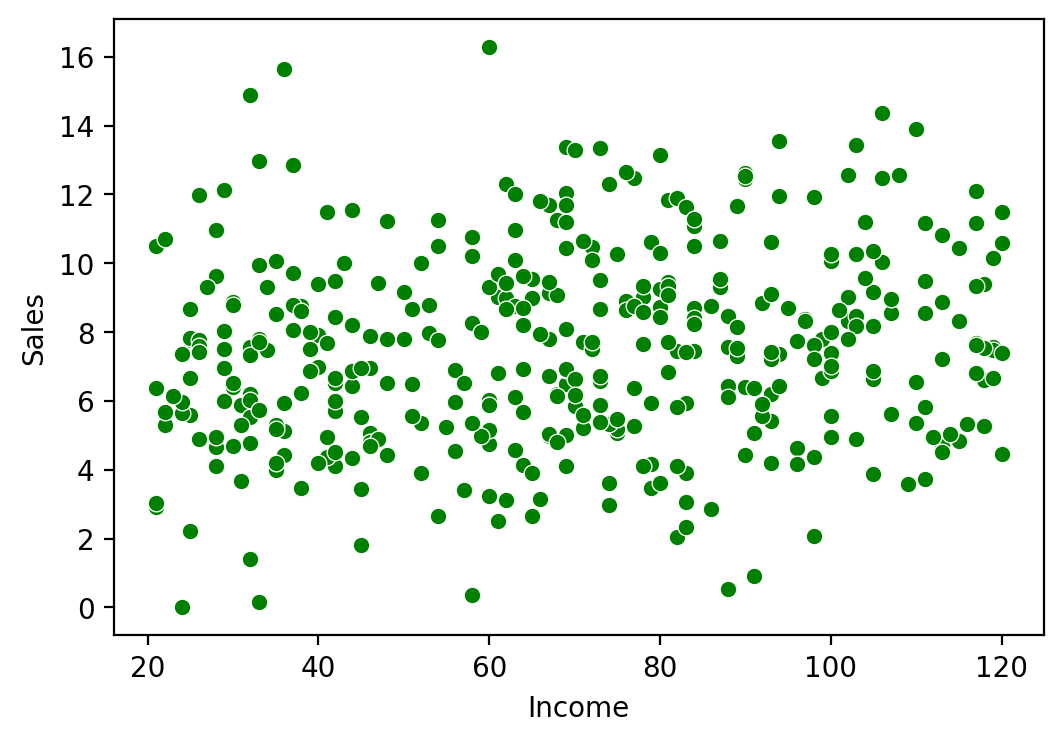

In [21]:
sns.scatterplot(x='Income', y='Sales', data=carseat, c='g')
plt.show()

- **질문:** 시각화 결과로 무엇을 확인할 수 있나요?

In [13]:
# 고르게 분포되어 있다?

2️⃣ **판매가격(Price) → 판매량(Sales)**

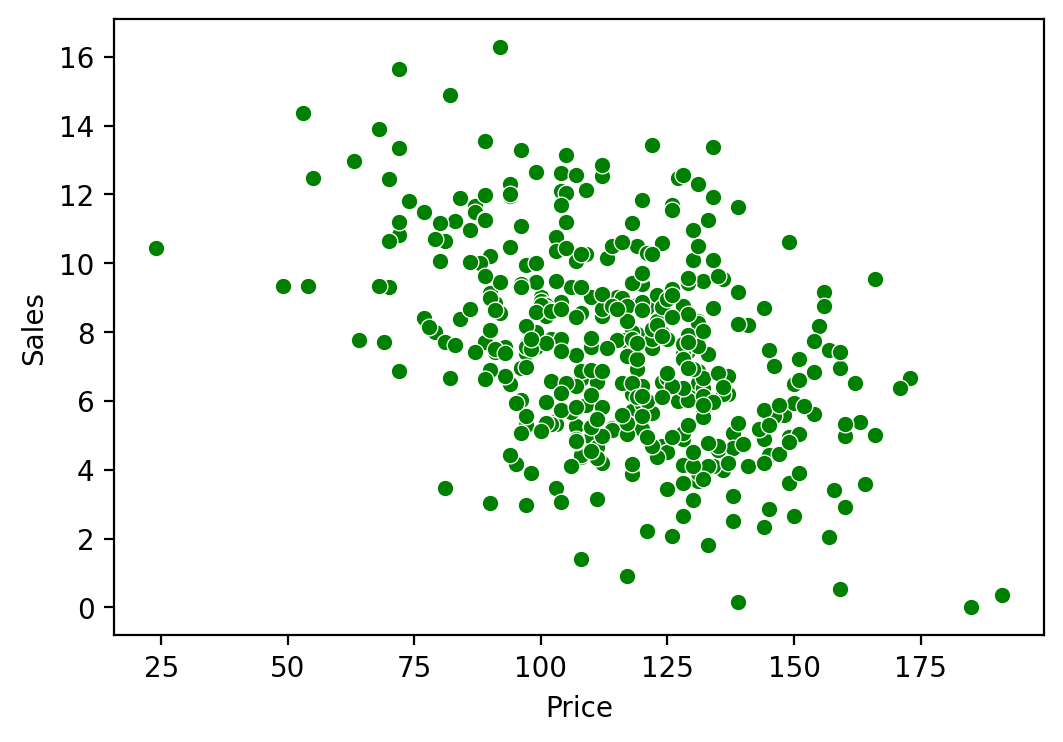

In [34]:
sns.scatterplot(x='Price', y='Sales', data=carseat, c='g')
plt.show()

- **질문:** 시각화 결과로 무엇을 확인할 수 있나요?

In [14]:
#

3️⃣ **평균연령(Age) → 판매량(Sales)**

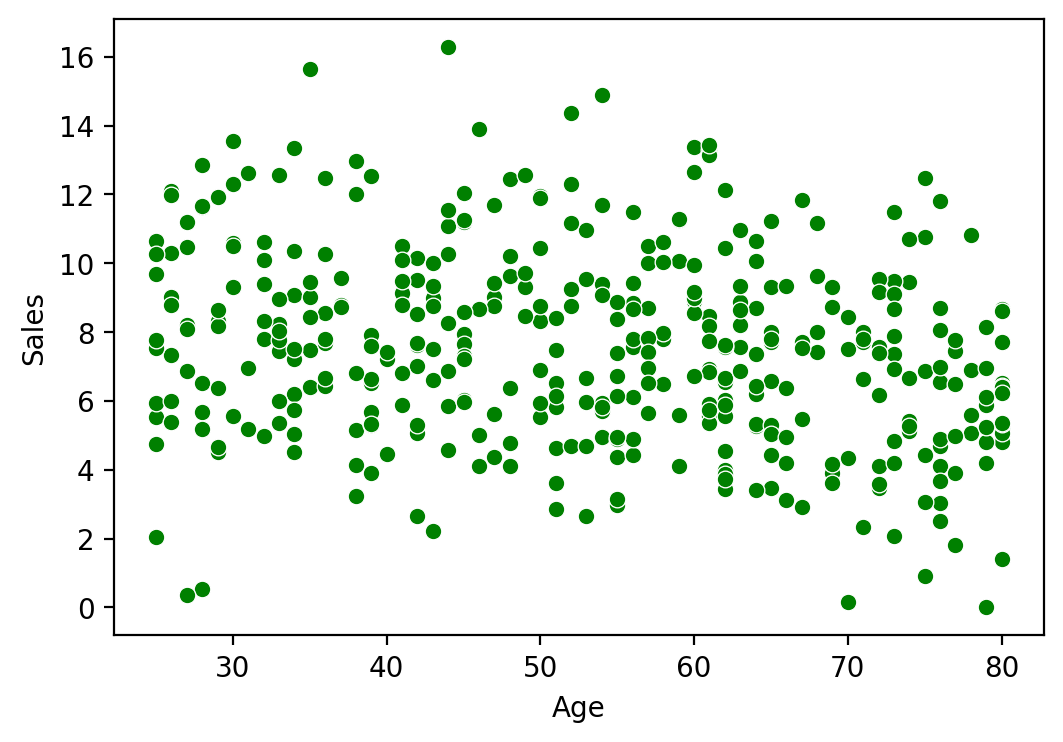

In [23]:
sns.scatterplot(x='Age', y='Sales', data=carseat, c='g')
plt.show()

- **질문:** 시각화 결과로 무엇을 확인할 수 있나요?

In [15]:
#

**2) 모든 숫자형 변수에 대한 산점도를 한꺼번에 그려보세요.**

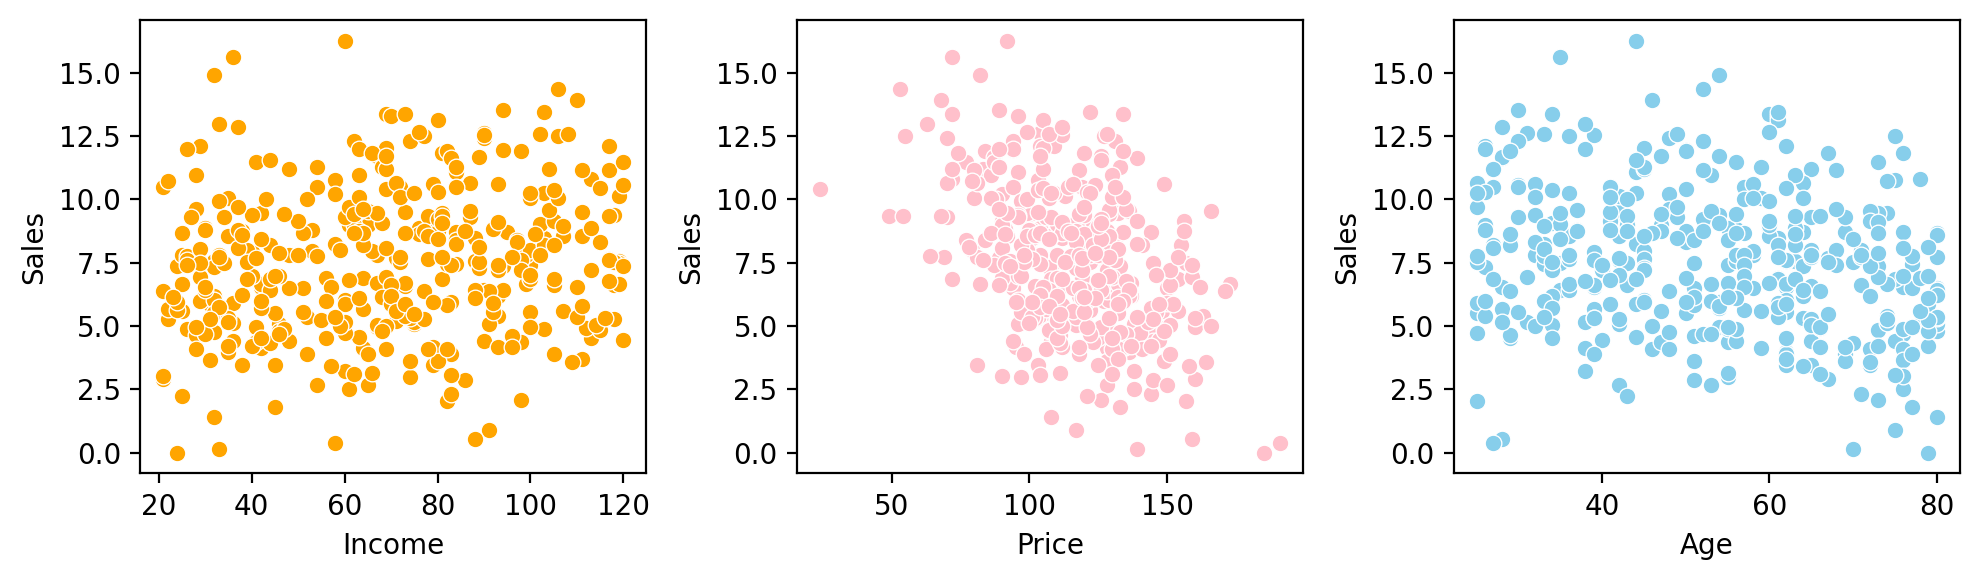

In [47]:
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
sns.scatterplot(x='Income', y='Sales', data=carseat, c='orange')

plt.subplot(1,3,2)
sns.scatterplot(x='Price', y='Sales', data=carseat, c='pink')

plt.subplot(1,3,3)
sns.scatterplot(x='Age', y='Sales', data=carseat, c='skyblue')

plt.tight_layout()
plt.show()

## **3. 수치화**

**1) 다음 두 변수들 간의 상관관계를 상관계수와 p_value로 수치화해 확인하세요.**

1️⃣ **평균소득(Income) → 판매량(Sales)**

In [26]:
result = spst.pearsonr(carseat['Income'], carseat['Sales'])

print(result)
print('* 상관계수:', result[0])
print('* p-value:', result[1])
print('* p-value:', f'{result[1]:.25f}')

PearsonRResult(statistic=0.15195097946754424, pvalue=0.0023096704539517904)
* 상관계수: 0.15195097946754424
* p-value: 0.0023096704539517904
* p-value: 0.0023096704539517904329615


- **질문:** 결과를 해석해 보세요.

In [16]:
#

2️⃣ **판매가격(Price) → 판매량(Sales)**

In [27]:
result = spst.pearsonr(carseat['Price'], carseat['Sales'])

print(result)
print('* 상관계수:', result[0])
print('* p-value:', result[1])
print('* p-value:', f'{result[1]:.25f}')

PearsonRResult(statistic=-0.4449507278465726, pvalue=7.618187011913169e-21)
* 상관계수: -0.4449507278465726
* p-value: 7.618187011913169e-21
* p-value: 0.0000000000000000000076182


- **질문:** 결과를 해석해 보세요.

In [17]:
#

3️⃣ **평균연령(Age) → 판매량(Sales)**

In [28]:
result = spst.pearsonr(carseat['Age'], carseat['Sales'])

print(result)
print('* 상관계수:', result[0])
print('* p-value:', result[1])
print('* p-value:', f'{result[1]:.25f}')

PearsonRResult(statistic=-0.2318154396045765, pvalue=2.7889498393714038e-06)
* 상관계수: -0.2318154396045765
* p-value: 2.7889498393714038e-06
* p-value: 0.0000027889498393714037717


- **질문:** 결과를 해석해 보세요.

In [18]:
#

**2) 각 변수들 간에 상관계수를 구해 보세요.**

In [30]:
carseat.corr(numeric_only=True).style.background_gradient()

,Sales,CompPrice,Income,Advertising,Population,Price,Age
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000


**3) 위 결과를 Seaborn의 heatmap() 함수로 시각화하세요.**

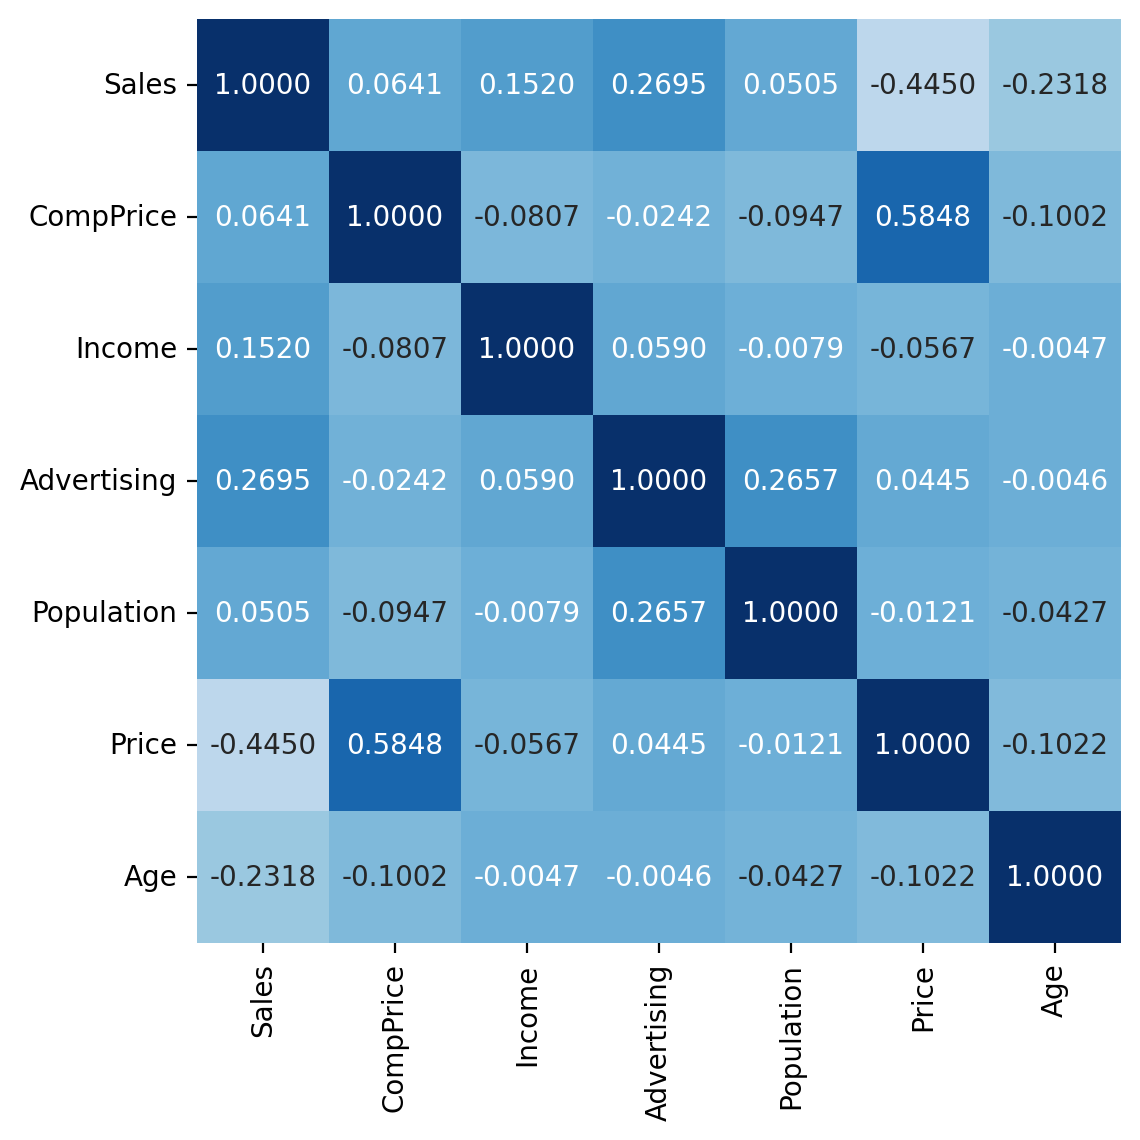

In [49]:
plt.figure(figsize=(6,6))
sns.heatmap(carseat.corr(numeric_only=True),
           annot=True,
           fmt='.4f',
           cmap='Blues',
           vmin=-1,
           vmax=1,
           square=True,
           cbar=False)
plt.show()

- **질문:** 위 결과에서 가장 강한 상관관계와 약한 상관관계를 찾아 보세요.

In [48]:
# 가장 강한 상관관계: Price -> Comprice
# 가장 약한 상관관계: Age -> Advertising